In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader


import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
print("Uisng Device:", device)






Uisng Device: cuda


In [7]:
tranform = transforms.ToTensor()

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=tranform
)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=tranform
)

In [8]:
train_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)


test_loader = DataLoader(
    test_data,
    batch_size=64,
    shuffle=False
)

In [9]:
class DigitModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 10)
        )

    
    def forward(self, x):
        return self.net(x)
    


model = DigitModel().to(device)

# using og loass fuction 
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)





In [ ]:
epochs = 5

for epoch in range(epochs):
    model.train()
    total_loss = 0

    #  for the train loader 

    for images, labels in train_loader:
        images = images.view(images.size(0), -1).to(device)
        labels = labels.to(device)

        # using the optimizer syntax
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()


    # print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")     this is to get the average loss per batch
    print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f}")

Epoch 1/5 | Loss: 18.5939
Epoch 2/5 | Loss: 16.3743
Epoch 3/5 | Loss: 13.2210
Epoch 4/5 | Loss: 12.0994
Epoch 5/5 | Loss: 12.3507


In [ ]:
model.eval()
correct = 0
total = 0


# for the test loader with torch.no_grad():
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1).to(device)
        labels = labels.to(device)


        outputs = model(images)
        predictions = outputs.argmax(dim=1)


        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
predictions = (f"Total Accuracy on test set: {accuracy:.2f}%")


torch.save(model.state_dict(), "mnist_model.pth")
print("model saved as mnist_model.pth")

model saved as mnist_model.pth


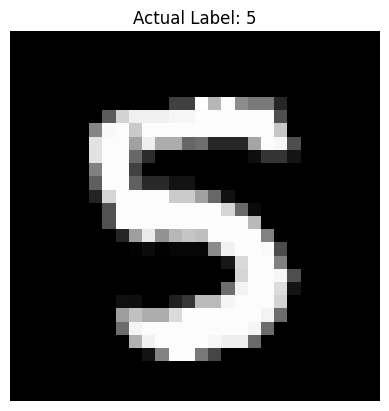

User predicated image index:  120
Actual label: 5
Model prediction: 5


In [33]:
index = 120
image , true_label = test_data[index]


plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(f"Actual Label: {true_label}")
plt.axis("off")
plt.show()


image_flat = image.view(1, -1).to(device)


with torch.no_grad():
    output = model(image_flat)
    predicted_label = output.argmax(dim=1).item()


print(f"User predicated image index: ", index)
print(f"Actual label:", true_label)
print(f"Model prediction:", predicted_label)

